### 統計學習初論 
### Homework 1

請將HTML檔上傳至Ceiba作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。


### 第一題 [myknn_regressor]
(50%) K-nearest-neighbors (KNN) is a power method to construct nonparametric regression models. The goal of this question is to construct your own KNN regressor. To simplify the question, we are going to use the "brute-force" method to find nearest neighbors. That is, we are not going to use specialized data structures such as the K-D tree to speed up the process. Given a set of $N$ training data points and a pre-defined hyper-parameter k, the prediction for a testing data point $x_a$ is computed by locating $k$ data points in the training data that is cloest to $x_a$. If the outcome values of the $k$ nearest neighbors are $\mathbf{y}_a = \{y_1, y_2, ..., y_k\}$, then the prediction is $f(\mathbf{y}_a)$, where $f$ is a real-valued function. We are going to consider two possible choices of $f$. The first option is  $f(\mathbf{y}_a) = 1/k \sum_{i=1}^k y_i.$ This is referred to as the "equal-weight" case. The other option is to compute the mean after removing outliers. We define outliers as the data points that are outside of $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$, where $Q1$ and $Q3$ are the first and third quantile of $\mathbf{y}_a$, and $IQR = Q3 - Q1$. Since quantiles and IQR only make sense when there are enough neighbors, we allow the "remove_outliers" only if $k>=10$. If $k<10$, use the "equal_weight" $f$ even if the user specify the other way. 

Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the $k$ as the hyper-parameter for the number of neighbors. Moreover, the user can select $f$ by passing "equal_weight" or "remove_outliers" to switch between the two possible cases for $f$. 

The sample usage should be like the following:
```python
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
```

The first line initiates an myknn_regressor object with $k=20$ and selected "remove_outliers" for $f$; the second line train the model and the third line computes prediction. 

You are only allowed to use numpy in your own myknn_regressor class. You will receive a zero score if you adopted an existing KNN regressor such as those in scikit-learn. The input features and output predictions should be numpy arrays. If there is a tie in selecting neighbors, myknn_regressor should break the tie by choosing the data point that is located closer to the beginning of the training dataset. 

#### Dataset
We are going to use a subset of the "Million Songs Dataset" in this question. The dataset has been pre-processed and the training and testing dataset has been splitted and stored in a dictionary data structure. You can load the data from from msd_data1.pickle using pickle.load(). There are four elements in the dictionary: x_train, y_train, x_test, y_test. As indicated by their names, these four elements are training and testing data. The outcome variable (i.e. $y$) is the year a song was released, and the features are variables that characterize the sound of a song. The goal is to predict the release year given sound features.

Answer the following questions:

* Q1.1 Create your myknn_regressor. 
* Q1.2 Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model.  Make predictions using $k=20$ and "equal_weight" $f$. List the RMSE and the first 20 predictions in the testing data. 
* Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance.  Make predictions using $k=20$ and "remove_outier" $f$. List the RMSE and the first 20 predictions in the testing data. 


-------
### Solution

-------
#### Q1.1
Below is the definition of myknn_regressor:


In [1]:
import numpy as np

class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 - 1.5IQR].  This is how box plot  detect outliers"""
        self.k = n_neighbors
        self.mean_type = mean_type
        pass

    def fit(self, x_train, y_train):
        self.x_train = x_train.copy()
        self.y_train = y_train.copy()

    def predict(self, x_test):
        """use remove_outliers only if k>=5"""
        ypred = []
        for rowid in range(0, x_test.shape[0]):
            # for rowid in [0, 1, 2]:
            atest = x_test[rowid]
            diff = self.x_train - atest
            # diff2 = diff * diff
            diffmse = np.sum(diff * diff, 1)

            # mergesort is stable.
            id_dist = np.argsort(diffmse, kind='mergesort')
            yknn = self.y_train[id_dist[0:self.k]]

            if (self.mean_type == "equal_weight"):
                yout = np.mean(yknn)
            else:
                if self.k < 10:
                    yout = np.mean(yknn)
                else:
                    # remove observation outside of 1.5IQR, and compute the mean.
                    # this_iqr = iqr(yknn)
                    q13 = np.quantile(yknn, [0.25, 0.75])
                    iqc = q13[1] - q13[0]
                    lower = q13[0] - 1.5 * iqc
                    upper = q13[1] + 1.5 * iqc
                    cond1 = np.logical_and(yknn > lower, yknn < upper)
                    yknn2 = yknn[cond1]
                    # if yknn2.shape[0] != yknn.shape[0]:
                    #    print("yknn = ", yknn)
                    #    print("yknn2 = ", yknn2)

                    # print(q13)
                    yout = np.mean(yknn2)

            ypred.append(yout)
        return(np.array(ypred))

As mandated by the question, only use numpy functions in this class. The neighbors were sorted via ```np.argsort(diffmse, kind='mergesort')``` because we need to break the tie by the position of the training data. Since merge sort is a stable sorting algorithm, it will keep the original order if there is a tie. You should not use the default quick sort algorithm since it is not stable. 

#### Q1.2
Doing prediction using "equal_weight" $f$. 

In [2]:
import pickle
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

#Load data
with open('data/msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

#make prediction
thek=20
myknn = myknn_regressor(thek, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
rmse1 = np.sqrt(np.mean(np.square(Y_test - ypred)))

print("RMSE (k=%d) using 'equal_weight'= %f" % (thek, rmse1))
print("The first 20 predictions are:\n", ypred[0:20])


RMSE (k=20) using 'equal_weight'= 10.251265
The first 20 predictions are:
 [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


The RMSE suggest that the average error is 10.2512 years. 

#### Q1.3
Doing prediction using "remove_outliers" $f$. 

In [3]:
thek=20
myknn = myknn_regressor(thek, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred2 = myknn.predict(X_test)
rmse2 = np.sqrt(np.mean(np.square(Y_test - ypred2)))

print("RMSE (k=%d) using 'remove_outliers'= %f" % (thek, rmse2))
print("The first 20 predictions are:\n", ypred2[0:20])

RMSE (k=20) using 'remove_outliers'= 10.219095
The first 20 predictions are:
 [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


The RMSE (10.219095 years) is smaller than the "equal_weight" $f$. This may be a general case or it just happen to have a better RMSE for this particular setting. Need more systematic evaluation in order to know whether "remove_outliers" is indeed better. 

### 第二題 [Tuning the Hyper-parameter]
(50%) We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from klearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases. 

For each case, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using $k=1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200$. In the first case, all feature values are standardize to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case use standardized feature and adopted myknn_regressor with "remove_outlier" $f$ to make prediction. 

For each case, plot a curve that shows the relations between $k$ (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations. 

------
#### Solution
------
Run the three cases and put the results in three lists. 

knn1 rmse (k=1) = 13.911075
knn2 rmse (k=1) = 14.923639
myknn rmse (k=1) using 'remove_outliers'= 13.911075
knn1 rmse (k=2) = 12.068171
knn2 rmse (k=2) = 12.777500
myknn rmse (k=2) using 'remove_outliers'= 12.068171
knn1 rmse (k=3) = 11.389121
knn2 rmse (k=3) = 12.075675
myknn rmse (k=3) using 'remove_outliers'= 11.389121
knn1 rmse (k=4) = 11.112335
knn2 rmse (k=4) = 11.767806
myknn rmse (k=4) using 'remove_outliers'= 11.112335
knn1 rmse (k=5) = 10.894693
knn2 rmse (k=5) = 11.466393
myknn rmse (k=5) using 'remove_outliers'= 10.894693
knn1 rmse (k=10) = 10.425999
knn2 rmse (k=10) = 11.077461
myknn rmse (k=10) using 'remove_outliers'= 10.472533
knn1 rmse (k=15) = 10.318172
knn2 rmse (k=15) = 10.888979
myknn rmse (k=15) using 'remove_outliers'= 10.298177
knn1 rmse (k=20) = 10.251265
knn2 rmse (k=20) = 10.797789
myknn rmse (k=20) using 'remove_outliers'= 10.219095
knn1 rmse (k=25) = 10.237627
knn2 rmse (k=25) = 10.790073
myknn rmse (k=25) using 'remove_outliers'= 10.190656
knn1 rmse (k=30)

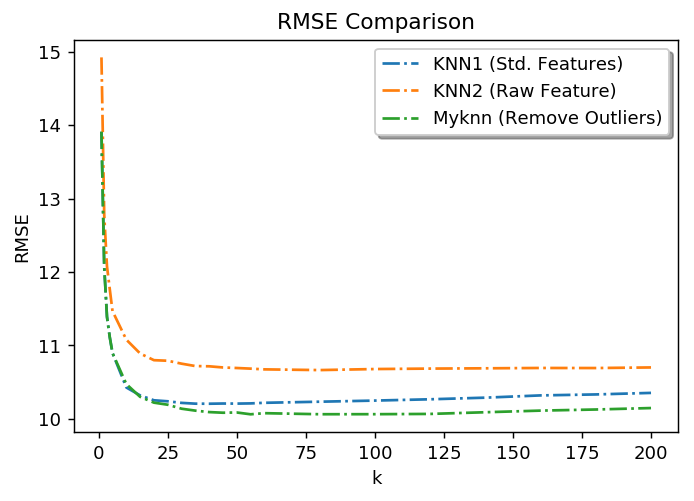

In [4]:
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Load data
with open('data/msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#use raw values
X_train = msd_data['X_train']
X_test = msd_data['X_test']

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']



kgrid = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
#kgrid = [1,5,10,30,50]
knnrmse1 = [] # case 1
knnrmse2 = [] # case 2
knnrmse3 = [] # case 3
for k in kgrid:
    #case 1
    neigh = KNeighborsRegressor(n_neighbors=k, algorithm='ball_tree')
    knn1 = neigh.fit(X_train_sd, Y_train)
    pred1 = knn1.predict(X_test_sd)
    rmse1 = np.sqrt(np.mean(np.square(Y_test - pred1)))
    print("knn1 rmse (k=%d) = %f" % (k, rmse1))
    knnrmse1.append(rmse1)
    #case 2
    knn2 = neigh.fit(X_train, Y_train)
    pred2 = knn2.predict(X_test)
    rmse2 = np.sqrt(np.mean(np.square(Y_test - pred2)))
    print("knn2 rmse (k=%d) = %f" % (k, rmse2))
    knnrmse2.append(rmse2)
    #case 3
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(X_train_sd, Y_train)
    ypred3 = myknn.predict(X_test_sd)
    rmse3 = np.sqrt(np.mean(np.square(Y_test - ypred3)))
    print("myknn rmse (k=%d) using 'remove_outliers'= %f" % (k, rmse3))
    knnrmse3.append(rmse3)
    
    

    
fig, ax = plt.subplots(dpi= 130)
#ax.set_ylim([9, 14.5])
ax.plot(kgrid, knnrmse1, "-.", label="KNN1 (Std. Features)")
ax.plot(kgrid, knnrmse2, "-.", label="KNN2 (Raw Feature)")
ax.plot(kgrid, knnrmse3, "-.", label="Myknn (Remove Outliers)")


legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
ax.set(xlabel='k', ylabel='RMSE', title='RMSE Comparison')
plt.show()    
    
    
    

There is a clear U-shape for each of the three cases. The best RMSE for the three cases are: 10.204 (k=40) for Case 1, 10.663 (k=80) for Case 2, and 10.060 (k=55) for Case 3. It looks like Case 3, our own myknn_regressor is the best model at least using this particular dataset. 

Another important question is why myknn_regressor is better. There are many variations in KNN. The most commonly used setting is Euclidian distance with standardized features and run predictions with equal weighting. This setting is popular because KNN is usually considered as a "baseline" model, and a "vanilla" setting is usually good enough. However, there are indeed many small places that can be further improved even for this very simply approach. 
